In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # para leer datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import sklearn.neural_network
from sklearn.utils.multiclass import unique_labels

In [31]:
# Carga datos
data = pd.read_csv( 'data_Sha_64.txt' , delimiter=',' )
#data.head()

data.keys()
X = data[data.keys()[1:]] # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = data[data.keys()[0]]
print(np.shape(X), np.shape(Y))

(1599, 64) (1599,)


In [0]:
species = np.array(Y.copy())
species = np.unique(species)

target = []
for i in range(len(Y)):
    for j in range(len(species)):
        if Y[i] == species[j]:
            target.append( j )

In [0]:
# Vamos a hacer un split training test
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split( X, target, train_size=0.5 )

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

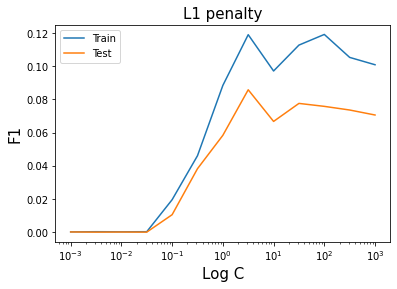

In [54]:
C_array = np.logspace(-3, 3, 13)

sparsity_array = []
f1_logist1_array = []
f1_logist1_test_array = []

for c in C_array:
    # Turn up tolerance for faster convergence
    clf = LogisticRegression( C=c, penalty='l1', solver='saga', tol=0.1 )
    clf.fit(X_train, Y_train)
    sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )
    f1_logist1_array.append( sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
    f1_logist1_test_array.append( sklearn.metrics.f1_score(Y_test, clf.predict(X_test), average='macro') )
    
plt.plot( C_array, f1_logist1_array , label= 'Train' )
plt.plot( C_array, f1_logist1_test_array , label= 'Test' )
plt.title('L1 penalty', fontsize=15)
plt.ylabel("F1" ,fontsize=15 )
plt.xlabel( 'Log C' ,fontsize=15 )
plt.xscale( "log" )
plt.legend( )
plt.show()

In [55]:
C_best = 5.5
# Turn up tolerance for faster convergence
clf = LogisticRegression( C=C_best, penalty='l1', solver='saga', tol=0.1 )
clf.fit(X_train, Y_train)
sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )

F1_logist1 = sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro')
print('F1 = ', F1_logist1 )

F1 =  0.11286659015672526


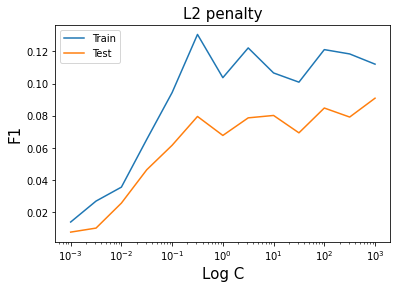

In [56]:
sparsity_array = []
f1_logist2_array = []
f1_logist2_test_array = []

for c in C_array:
    # Turn up tolerance for faster convergence
    clf = LogisticRegression( C=c, penalty='l2', solver='saga', tol=0.1 )
    clf.fit(X_train, Y_train)
    sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )
    f1_logist2_array.append( sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro') )
    f1_logist2_test_array.append( sklearn.metrics.f1_score(Y_test, clf.predict(X_test), average='macro') )
    
plt.plot( C_array, f1_logist2_array , label= 'Train' )
plt.plot( C_array, f1_logist2_test_array , label= 'Test' )
plt.title('L2 penalty', fontsize=15)
plt.ylabel("F1" ,fontsize=15 )
plt.xlabel( 'Log C' ,fontsize=15 )
plt.xscale( "log" )
plt.legend( )
plt.show()

In [57]:
C_best = 0.5
# Turn up tolerance for faster convergence
clf = LogisticRegression( C=C_best, penalty='l2', solver='saga', tol=0.1 )
clf.fit(X_train, Y_train)
sparsity_array.append( np.mean(clf.coef_ == 0) * 100 )

F1_logist2 = sklearn.metrics.f1_score(Y_train, clf.predict(X_train), average='macro')
print('F1 = ', F1_logist2 )

F1 =  0.11701329712618122


In [47]:
max_iteration = 5000
K = 25
loss_array = []
f1_array = []
f1_test_array = []
for j in range(K):
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                                hidden_layer_sizes=(j+1), 
                                                max_iter=max_iteration)
    mlp.fit(X_train, Y_train)
    loss_array.append( mlp.loss_ )
    f1_array.append( sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro') )
    f1_test_array.append( sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro') )


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

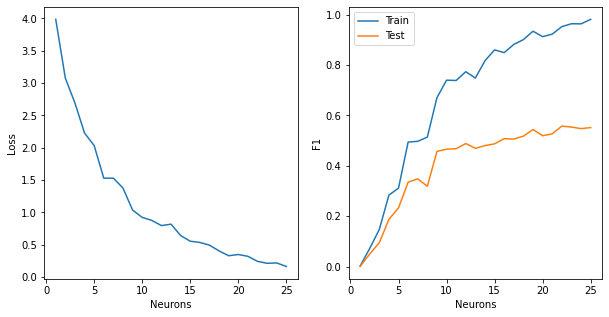

In [48]:
neuron_array = np.arange( 1, K+1, 1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(neuron_array, loss_array )
plt.ylabel("Loss")
plt.xlabel( 'Neurons' )

plt.subplot(1,2,2)
plt.plot(neuron_array, f1_array , label= 'Train' )
plt.plot(neuron_array, f1_test_array , label= 'Test' )
plt.ylabel("F1")
plt.xlabel( 'Neurons' )
plt.legend( )

plt.subplots_adjust(hspace=.5)
plt.savefig( 'loss_f1.png' )
plt.show()

In [52]:
max_iteration = 5000
K = 10
loss_array = []
f1_array = []
f1_test_array = []
for i in range(int(K/2)):
    for j in range(1, K):
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                                   hidden_layer_sizes=(i+1, j+1), 
                                                   max_iter=max_iteration)
        mlp.fit(X_train, Y_train)
        loss_array.append( mlp.loss_ )
        f1_array.append( sklearn.metrics.f1_score(Y_train, mlp.predict(X_train), average='macro') )
        f1_test_array.append( sklearn.metrics.f1_score(Y_test, mlp.predict(X_test), average='macro') )

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

In [53]:
np.reshape(f1_array, (int(K/2),K-1))

array([[0.01910386, 0.01669888, 0.01730436, 0.03326091, 0.02349226,
        0.03237221, 0.02837617, 0.03164226, 0.03092918],
       [0.06180016, 0.10518449, 0.17583965, 0.1487129 , 0.23135526,
        0.25736263, 0.23697092, 0.25944983, 0.24490713],
       [0.06115278, 0.11126613, 0.12241149, 0.18969672, 0.26714438,
        0.2907409 , 0.32276413, 0.31037939, 0.39881587],
       [0.05383299, 0.08653737, 0.21229428, 0.24792918, 0.24006532,
        0.37575537, 0.4111507 , 0.43150371, 0.4389596 ],
       [0.05665271, 0.12140786, 0.13052642, 0.3060037 , 0.4269164 ,
        0.34804562, 0.4273707 , 0.49625934, 0.48041342]])

In [0]:
loss_array_copy = np.reshape(loss_array, (int(K/2),K-1))
f1_array_copy = np.reshape(f1_array, (int(K/2),K-1))
f1_test_array_copy = np.reshape(f1_test_array, (int(K/2),K-1))

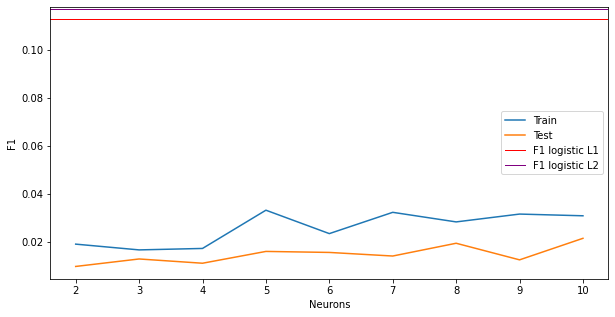

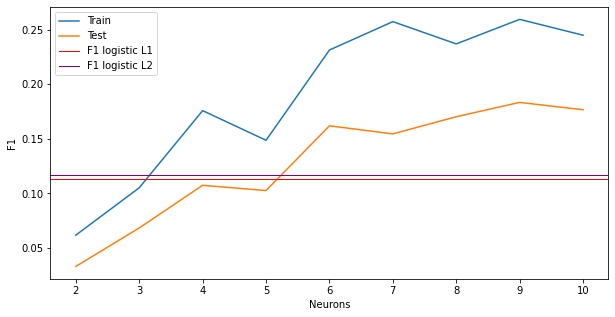

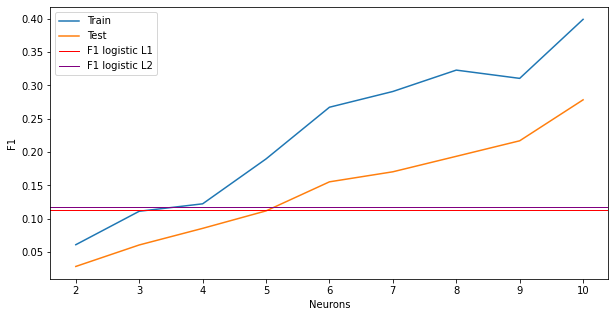

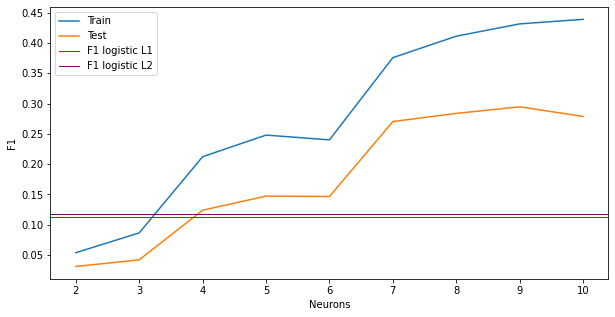

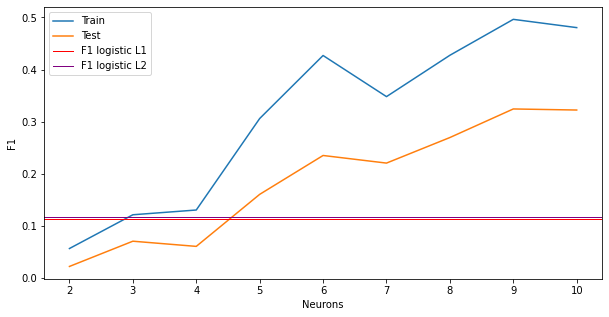

In [72]:
neuron_array = np.arange( 2, K+1, 1)

for i in range(int(K/2)):

    plt.figure(figsize=(10,5))

    
    plt.plot(neuron_array, f1_array_copy[i] , label= 'Train' )
    plt.plot(neuron_array, f1_test_array_copy[i] , label= 'Test' )
    plt.axhline( y = F1_logist1 , linewidth = 1 , color = 'red' , label = 'F1 logistic L1' )
    plt.axhline( y = F1_logist2 , linewidth = 1 , color = 'purple' , label = 'F1 logistic L2' )
    plt.ylabel("F1")
    plt.xlabel( 'Neurons' )
    plt.legend( )

    plt.subplots_adjust(hspace=.5)
    plt.savefig( 'loss_f1_2.png' )
    plt.show()